In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time
import os
from PIL import Image
from tqdm.notebook import tqdm_notebook

In [3]:
n_colors = 10

In [36]:
def preprossesing_image(filename):
    image = Image.open(filename)
    if image.mode in ('RGBA', 'LA'):
        background = Image.new(image.mode[:-1], image.size, (255,255,255))
        background.paste(image, image.split()[-1])
        image = background
    image = np.array(image, dtype=np.float64)/255.
    w, h, d = original_shape = image.shape
    assert d == 3
    image_array = np.reshape(image, (w*h, d))
    return image_array, w, h

In [20]:
path_train_masks = r'/data/student/training/patches/masks/masks/'

In [26]:
def reshape_label(labels, w, h):
    lbl_reshaped = np.zeros((w, h, 1))
    labels_idx = 0
    for i in range(w):
        for j in range(h):
            lbl_reshaped[i][j] = labels[labels_idx]
            labels_idx += 1
    return lbl_reshaped

In [27]:
def display_image_with_labels(labels, w, h, centers):
    image = np.zeros((w, h, 3))
    for i, row in enumerate(labels):
        for j, col in enumerate(row):
            image[i][j] = centers[int(col)]
    plt.imshow(image)
    plt.show()
    return image

In [37]:
t0 = time()
big_image_sample, w, h = shuffle(preprossesing_image(r'/data/student/training/masks/S_385 (24).png'), random_state=42)[:5000]
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(big_image_sample)
print('done in %0.3fs. ' % (time() - t0))
print(kmeans.cluster_centers_)

done in 470.751s. 
[[9.99952871e-01 9.99928500e-01 9.99943938e-01]
 [5.02272835e-01 5.26299733e-04 5.72318227e-04]
 [3.23104292e-04 3.19812465e-04 9.99998098e-01]
 [9.99984614e-01 2.84062009e-04 1.64916519e-01]
 [9.99987234e-01 9.99765717e-01 1.61654537e-03]
 [9.99391974e-01 4.14254113e-01 7.03920565e-01]
 [3.54201058e-04 5.02133227e-01 3.69331802e-04]
 [5.02182638e-01 5.03365805e-04 5.02122943e-01]
 [5.04564540e-01 5.02956919e-01 5.02366233e-01]
 [4.91700204e-01 4.83676057e-01 9.91012184e-01]]


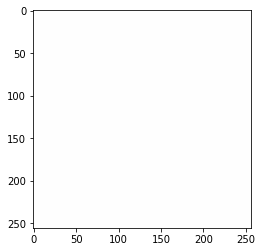

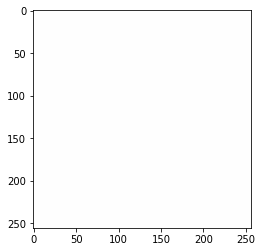

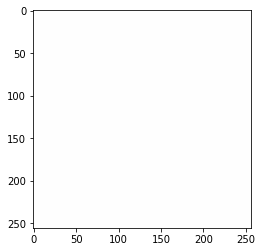

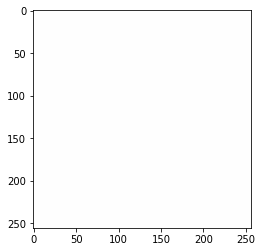

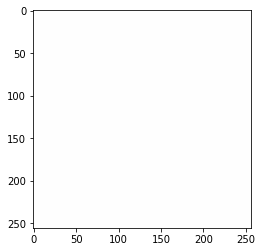

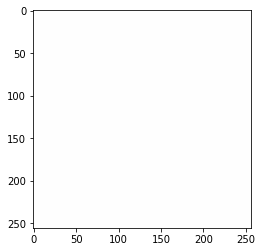

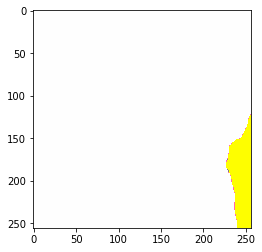

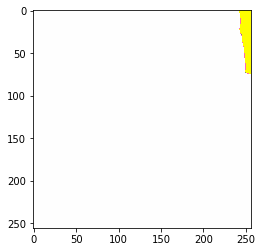

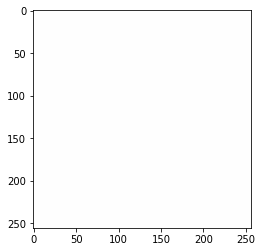

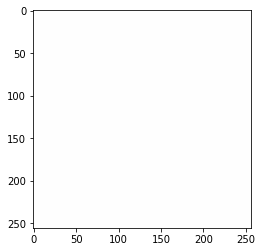

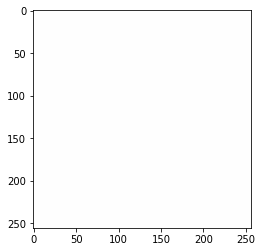

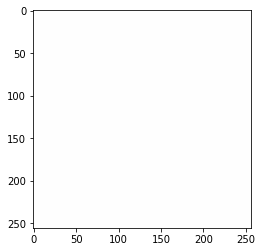

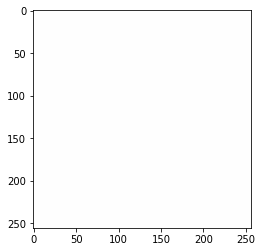

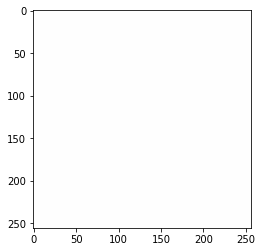

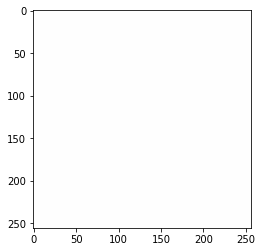

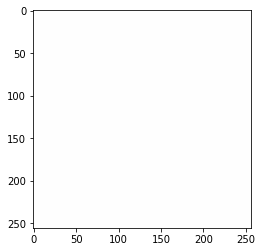

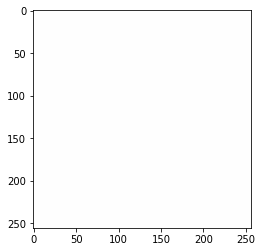

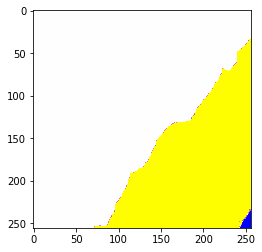

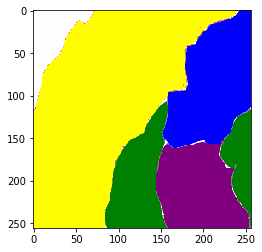

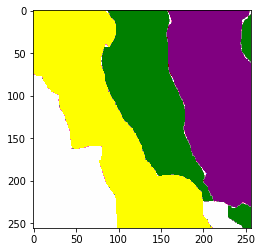

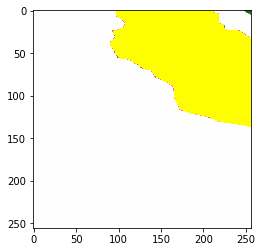

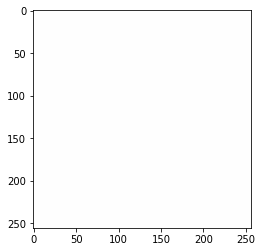

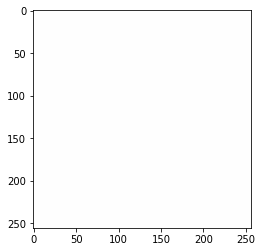

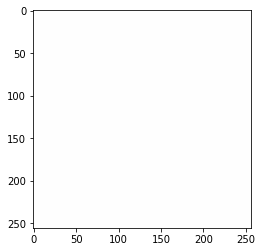

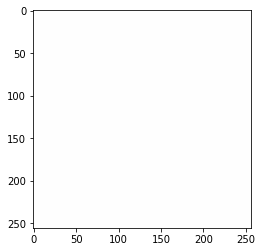

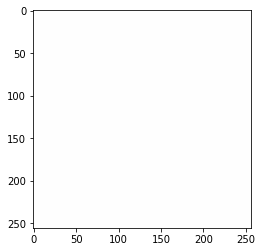

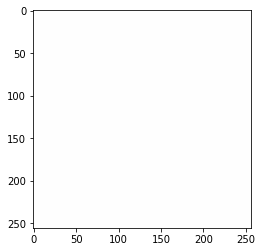

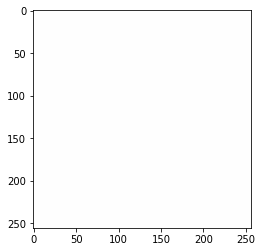

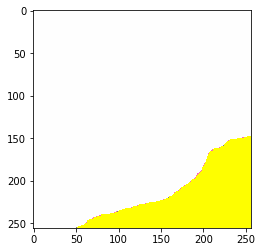

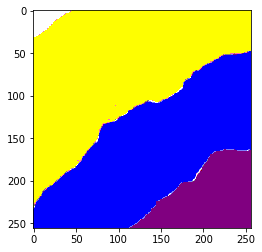

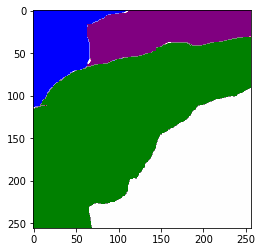

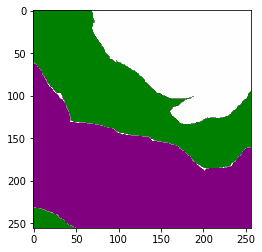

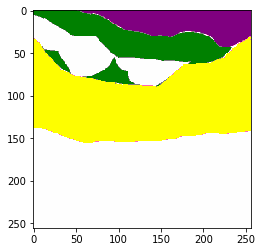

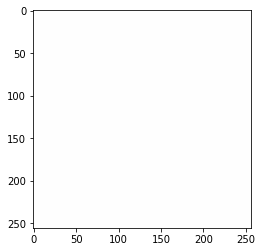

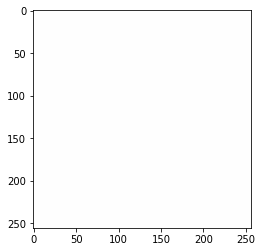

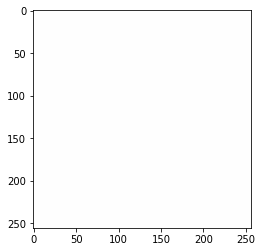

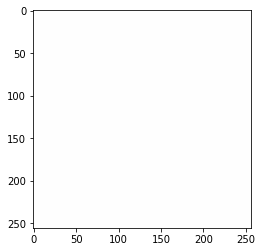

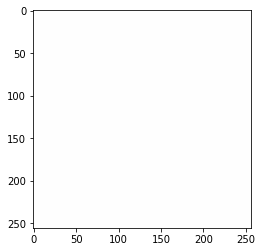

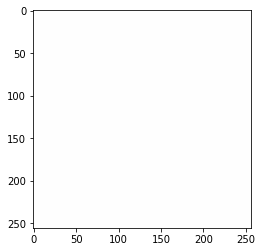

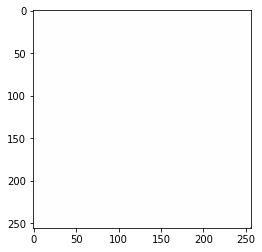

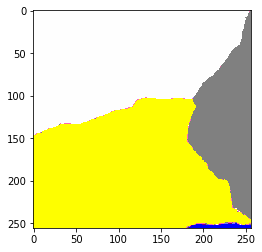

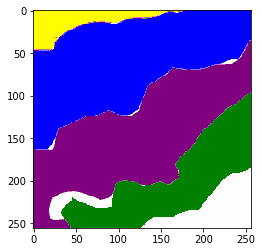

KeyboardInterrupt: 

In [39]:
ids = next(os.walk(path_train_masks))[2]
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    image_array, w, h = preprossesing_image(os.path.join(path_train_masks, id_))
    labels = reshape_label(kmeans.predict(image_array), w, h)
    cluster_image = display_image_with_labels(labels, w, h, kmeans.cluster_centers_)
    input()
    
    


In [40]:
t0 = time()
color_palette, w, h = preprossesing_image(r'/data/student/github/DLforWallCharacteristics/color_palette.tif')
kmeans_color_palette = KMeans(n_clusters=n_colors, random_state=42).fit(color_palette)
print('done in %0.3fs. ' % (time() - t0))
print(kmeans_color_palette.cluster_centers_)

done in 7.485s. 
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 5.01960784e-01  5.46229728e-13  5.01960784e-01]
 [ 1.00000000e+00  1.00000000e+00 -1.72306613e-13]
 [ 9.92539384e-13  5.01960784e-01 -1.72306613e-13]
 [ 9.92539384e-13  5.46229728e-13  1.00000000e+00]
 [ 1.00000000e+00  4.11764706e-01  7.05882353e-01]
 [ 1.00000000e+00  5.46229728e-13  1.64705882e-01]
 [ 5.01960784e-01  5.46229728e-13 -1.72306613e-13]
 [ 5.01960784e-01  5.01960784e-01  5.01960784e-01]
 [ 1.00000000e+00  6.47058824e-01 -1.72306613e-13]]


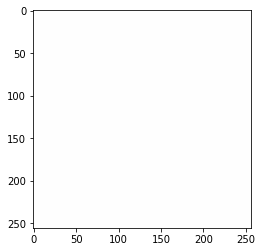

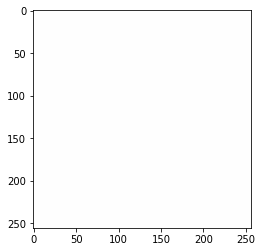

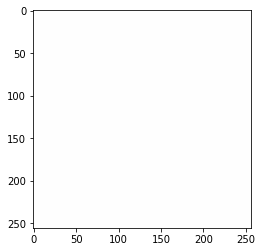

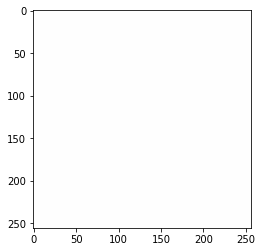

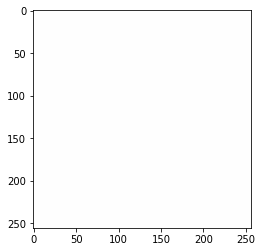

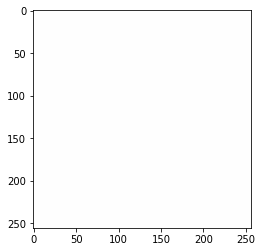

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


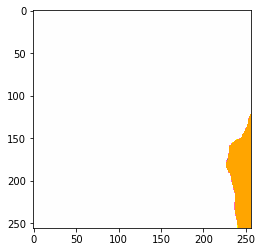

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


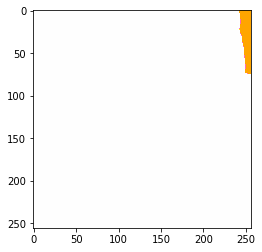

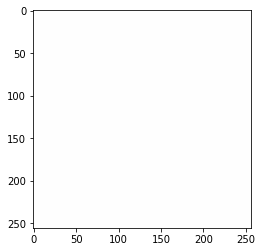

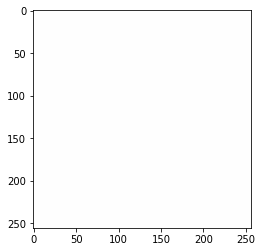

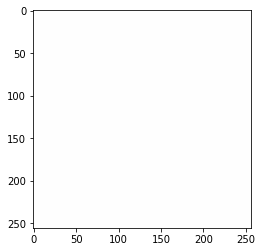

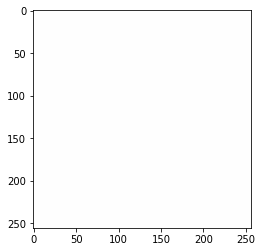

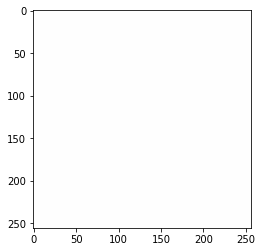

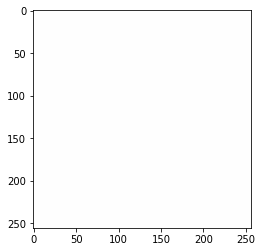

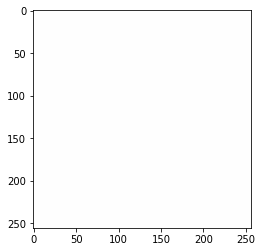

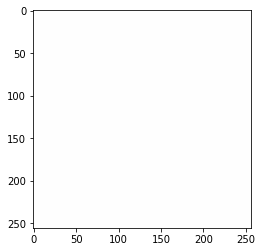

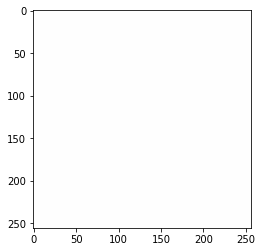

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


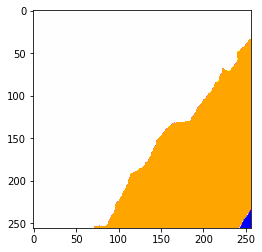

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


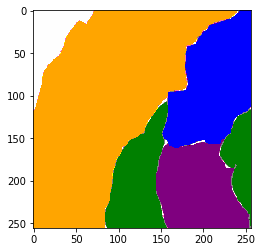

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


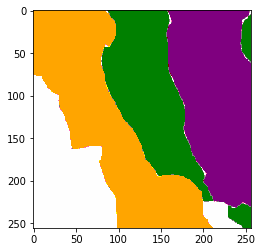

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


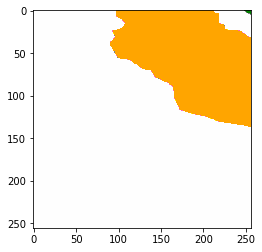

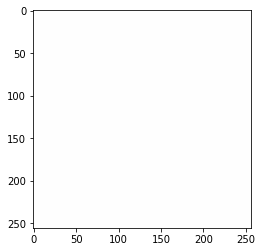

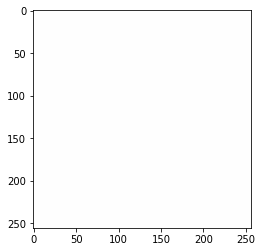

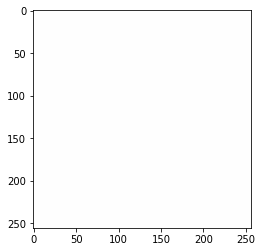

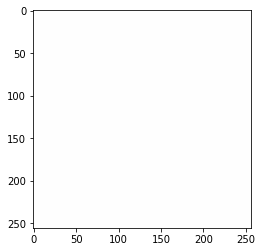

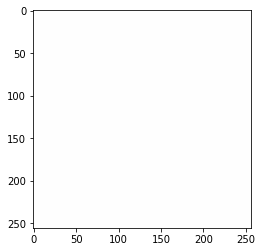

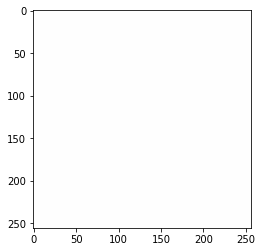

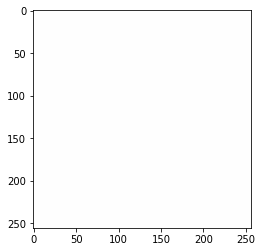

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


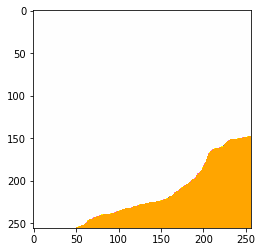

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


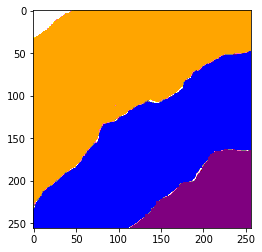

KeyboardInterrupt: 

In [41]:
ids = next(os.walk(path_train_masks))[2]
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    image_array, w, h = preprossesing_image(os.path.join(path_train_masks, id_))
    labels = reshape_label(kmeans_color_palette.predict(image_array), w, h)
    cluster_image = display_image_with_labels(labels, w, h, kmeans_color_palette.cluster_centers_)
    input()

In [42]:
t0 = time()
color_palette_2, w, h = preprossesing_image(r'/data/student/github/DLforWallCharacteristics/color_palette_2.jpg')
kmeans_color_palette_2 = KMeans(n_clusters=n_colors, random_state=42).fit(color_palette_2)
print('done in %0.3fs. ' % (time() - t0))
print(kmeans_color_palette_2.cluster_centers_)



done in 9.884s. 
[[9.99969192e-01 9.99974928e-01 9.99938496e-01]
 [5.01959467e-01 9.42431384e-05 1.74431373e-04]
 [9.99873380e-01 9.99968000e-01 3.90933333e-03]
 [5.01991529e-01 5.01991529e-01 5.01991529e-01]
 [1.73866668e-04 1.57992158e-04 9.95901051e-01]
 [6.41254916e-05 5.01975718e-01 3.96994510e-03]
 [9.99936878e-01 3.13098051e-05 1.64645333e-01]
 [9.99935247e-01 4.15438431e-01 7.05848094e-01]
 [5.05913537e-01 3.13725502e-05 4.98070463e-01]
 [9.99937380e-01 6.47121129e-01 3.31294119e-05]]


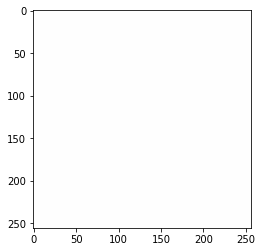

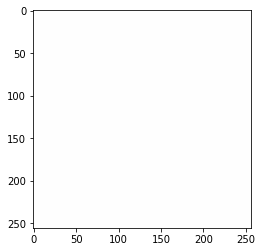

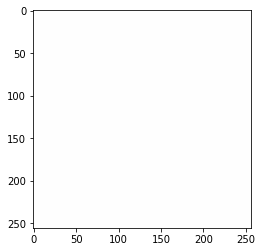

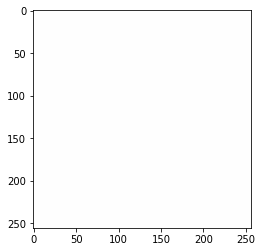

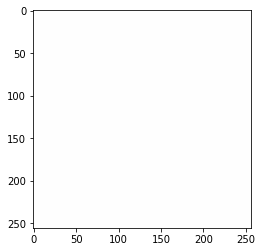

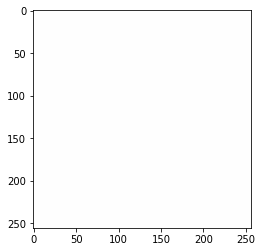

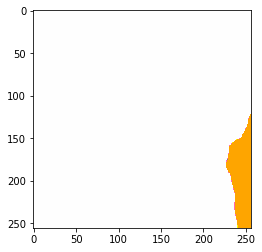

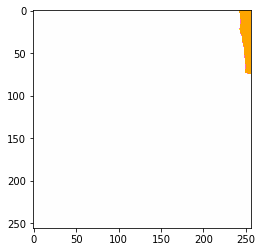

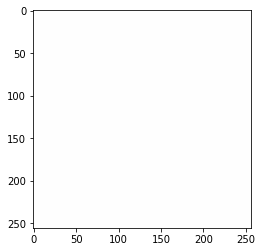

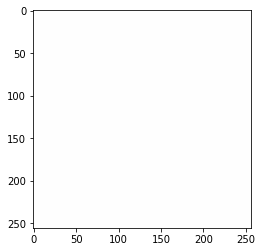

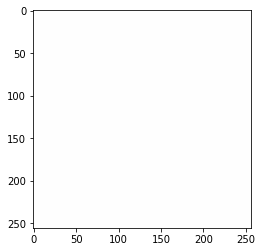

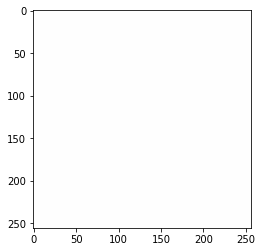

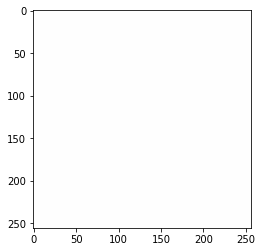

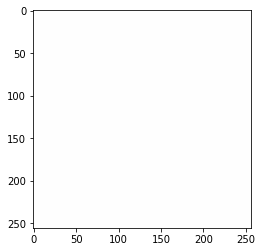

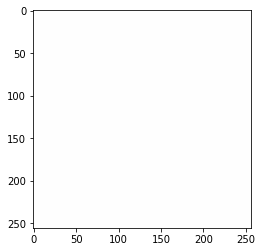

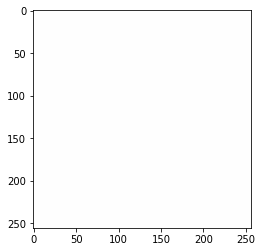

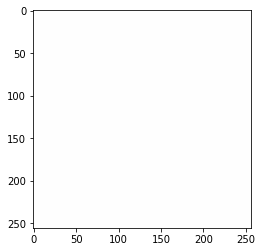

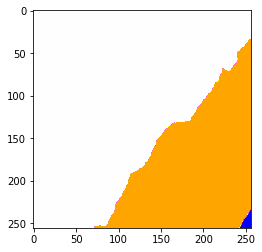

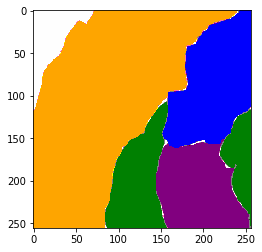

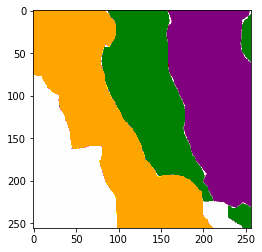

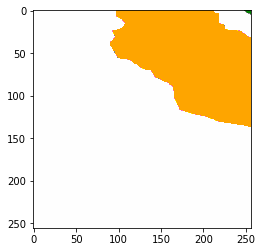

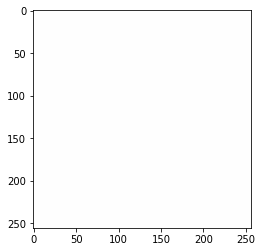

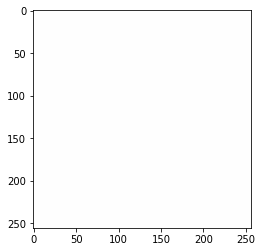

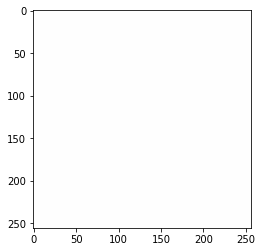

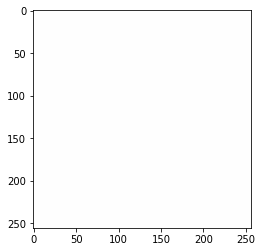

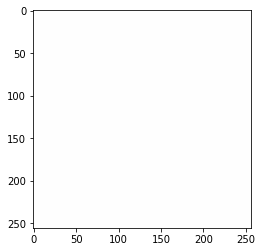

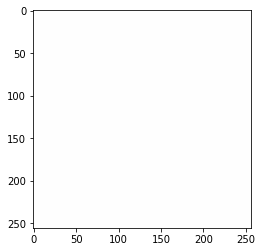

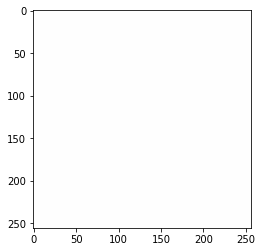

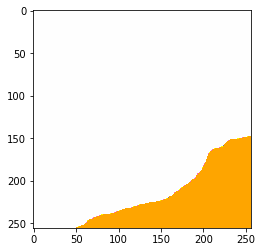

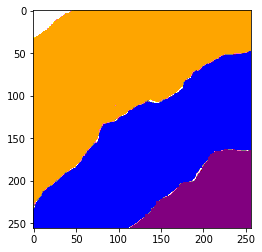

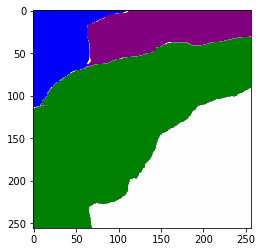

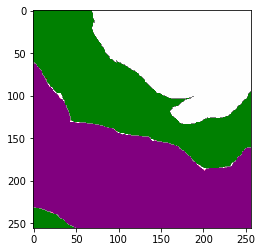

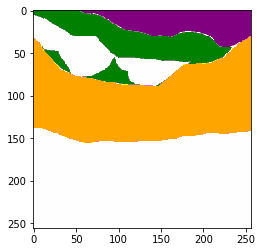

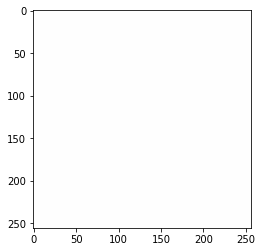

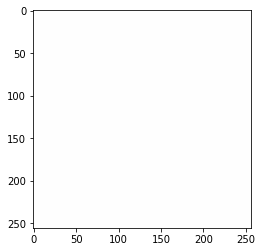

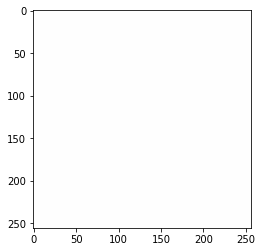

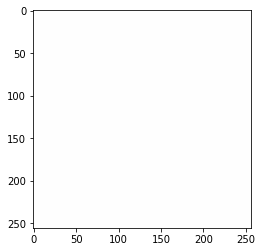

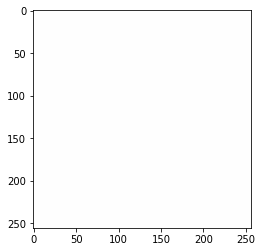

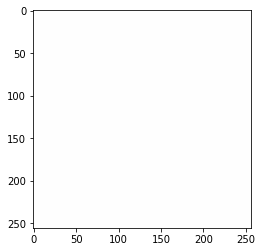

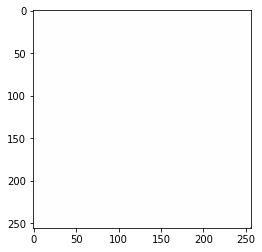

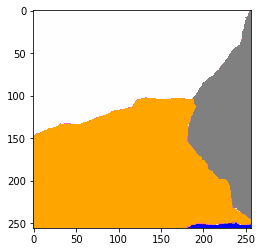

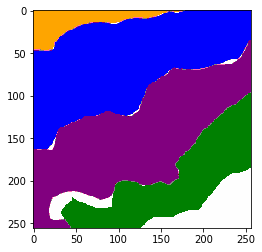

KeyboardInterrupt: 

In [43]:
ids = next(os.walk(path_train_masks))[2]
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    image_array, w, h = preprossesing_image(os.path.join(path_train_masks, id_))
    labels = reshape_label(kmeans_color_palette_2.predict(image_array), w, h)
    cluster_image = display_image_with_labels(labels, w, h, kmeans_color_palette_2.cluster_centers_)
    input()

In [44]:
colors = np.uint8(kmeans_color_palette_2.cluster_centers_*255)

In [45]:
colors

array([[254, 254, 254],
       [127,   0,   0],
       [254, 254,   0],
       [128, 128, 128],
       [  0,   0, 253],
       [  0, 128,   1],
       [254,   0,  41],
       [254, 105, 179],
       [129,   0, 127],
       [254, 165,   0]], dtype=uint8)

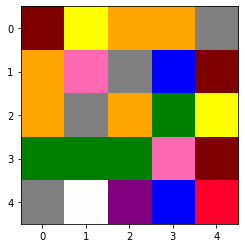

In [61]:
indices = np.random.randint(0, len(colors), size= (5,5))
plt.imshow(colors[indices]);

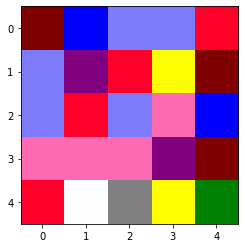

In [64]:
plt.imshow(np.uint8(kmeans.cluster_centers_*255)[indices]);

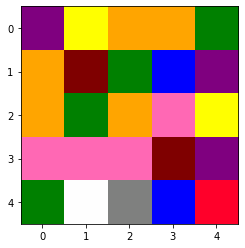

In [63]:
plt.imshow(np.uint8(kmeans_color_palette.cluster_centers_*255)[indices]);

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


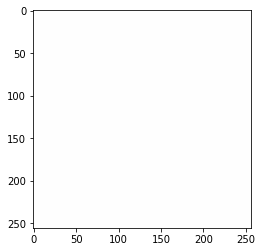


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


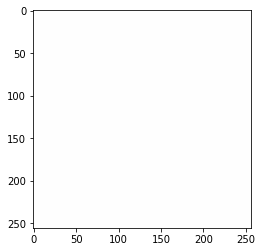


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


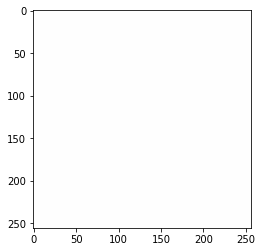


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


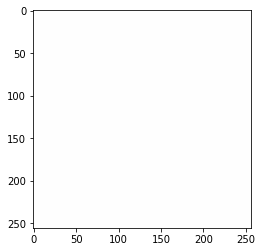


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


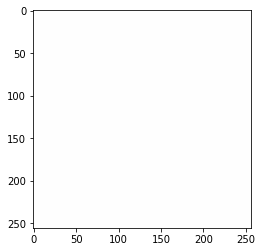


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


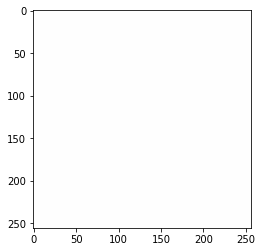


[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [9.]
  [9.]
  [9.]]

 [[0.]
  [0.]
  [0.]
  ...
  [9.]
  [9.]
  [9.]]

 [[0.]
  [0.]
  [0.]
  ...
  [9.]
  [9.]
  [9.]]]


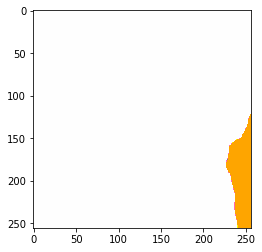

KeyboardInterrupt: 

In [66]:
ids = next(os.walk(path_train_masks))[2]
for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    image_array, w, h = preprossesing_image(os.path.join(path_train_masks, id_))
    labels = reshape_label(kmeans_color_palette_2.predict(image_array), w, h)
    print(labels)
    cluster_image = display_image_with_labels(labels, w, h, kmeans_color_palette_2.cluster_centers_)
    input()